In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
#  pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call. NEVER SAVE API KEY IN PLAIN TEXT OR IN OUTPUT
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# use the enumerate() method to get the index of the city for logging purposes and the city name for creating an endpoint URL
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # % = if i is divisble by 50
    if (i % 50 == 0 and i >= 50):
        # += add variable and then define variable as new value.
        set_count += 1
        record_count = 1
    # Replace the spaces in the city name with plus sign so that the url reads all the words in the city name.
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | krasnoselkup
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | bushehr
Processing Record 9 of Set 1 | mareeba
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 13 of Set 1 | voh
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | hami
Processing Record 21 of Set 1 | kavieng
Processing Record 22 of Set 1 | valera
Processing Record 2

Processing Record 37 of Set 4 | deputatskiy
Processing Record 38 of Set 4 | zaraza
Processing Record 39 of Set 4 | yenagoa
Processing Record 40 of Set 4 | filadelfia
Processing Record 41 of Set 4 | ca mau
Processing Record 42 of Set 4 | linguere
Processing Record 43 of Set 4 | ponta delgada
Processing Record 44 of Set 4 | zaqatala
Processing Record 45 of Set 4 | ambon
Processing Record 46 of Set 4 | ruangwa
Processing Record 47 of Set 4 | conakry
Processing Record 48 of Set 4 | wooster
Processing Record 49 of Set 4 | sterling
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | jamestown
Processing Record 3 of Set 5 | davila
Processing Record 4 of Set 5 | tessalit
Processing Record 5 of Set 5 | vaini
Processing Record 6 of Set 5 | prado
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | uyuni
Processing Record 9 of Set 5 | dumai
Processing Record 10 of Set 5 | bilma
Processing Record 11 of Set 5 | chok

Processing Record 28 of Set 8 | mweka
Processing Record 29 of Set 8 | abu dhabi
Processing Record 30 of Set 8 | cairns
Processing Record 31 of Set 8 | praia
Processing Record 32 of Set 8 | nagorsk
Processing Record 33 of Set 8 | warqla
City not found. Skipping...
Processing Record 34 of Set 8 | samarinda
Processing Record 35 of Set 8 | floro
Processing Record 36 of Set 8 | sovetskaya
Processing Record 37 of Set 8 | hambantota
Processing Record 38 of Set 8 | bathsheba
Processing Record 39 of Set 8 | viedma
Processing Record 40 of Set 8 | muros
Processing Record 41 of Set 8 | monterey
Processing Record 42 of Set 8 | pochutla
Processing Record 43 of Set 8 | soyo
Processing Record 44 of Set 8 | fare
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | korhogo
Processing Record 47 of Set 8 | serov
Processing Record 48 of Set 8 | arauco
Processing Record 49 of Set 8 | shahr-e babak
Processing Record 50 of Set 8 | robertsport
Processing Record 1 of Set 9 | belen
Proces

Processing Record 16 of Set 12 | bahsuma
Processing Record 17 of Set 12 | cabra
Processing Record 18 of Set 12 | butterworth
Processing Record 19 of Set 12 | lagoa
Processing Record 20 of Set 12 | placer
Processing Record 21 of Set 12 | krasnokamsk
Processing Record 22 of Set 12 | laguna
Processing Record 23 of Set 12 | yefimovskiy
City not found. Skipping...
Processing Record 24 of Set 12 | ous
Processing Record 25 of Set 12 | chandauli
Processing Record 26 of Set 12 | xingtai
Processing Record 27 of Set 12 | velikodvorskiy
Processing Record 28 of Set 12 | uzunovo
Processing Record 29 of Set 12 | xiaoweizhai
Processing Record 30 of Set 12 | envira
Processing Record 31 of Set 12 | bud
Processing Record 32 of Set 12 | kingisepp
Processing Record 33 of Set 12 | kondrovo
Processing Record 34 of Set 12 | haines junction
Processing Record 35 of Set 12 | rawson
Processing Record 36 of Set 12 | ketchikan
Processing Record 37 of Set 12 | dudinka
Processing Record 38 of Set 12 | novyy redant
Ci

In [9]:
len(city_data)

584

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
# creating a dataframe from a list of dictionaries works if  the dictionarys have the same keys.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Krasnoselkup,65.7000,82.4667,44.04,44,64,11.23,RU,2021-06-04 04:02:40
1,Mahebourg,-20.4081,57.7000,75.33,75,40,17.43,MU,2021-06-04 04:01:50
2,Saint-Philippe,-21.3585,55.7679,72.95,79,43,15.08,RE,2021-06-04 04:02:41
3,Avarua,-21.2078,-159.7750,76.14,77,27,6.17,CK,2021-06-04 04:02:41
4,Iqaluit,63.7506,-68.5145,33.80,86,90,14.97,CA,2021-06-04 04:00:27
5,New Norfolk,-42.7826,147.0587,48.76,38,33,9.40,AU,2021-06-04 04:02:42
6,Faanui,-16.4833,-151.7500,81.27,71,78,8.23,PF,2021-06-04 04:02:42
7,Bushehr,28.9684,50.8385,88.20,48,2,11.50,IR,2021-06-04 04:02:42
8,Mareeba,-17.0000,145.4333,83.32,55,50,2.24,AU,2021-06-04 04:02:53
9,Punta Arenas,-53.1500,-70.9167,35.11,93,100,7.34,CL,2021-06-04 04:02:53


In [11]:
nco = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[nco]

In [13]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Krasnoselkup,RU,2021-06-04 04:02:40,65.7000,82.4667,44.04,44,64,11.23
1,Mahebourg,MU,2021-06-04 04:01:50,-20.4081,57.7000,75.33,75,40,17.43
2,Saint-Philippe,RE,2021-06-04 04:02:41,-21.3585,55.7679,72.95,79,43,15.08
3,Avarua,CK,2021-06-04 04:02:41,-21.2078,-159.7750,76.14,77,27,6.17
4,Iqaluit,CA,2021-06-04 04:00:27,63.7506,-68.5145,33.80,86,90,14.97
...,...,...,...,...,...,...,...,...,...
579,Springfield,US,2021-06-04 04:04:58,37.2153,-93.2982,65.66,89,1,3.00
580,Vardo,NO,2021-06-04 04:06:14,70.3705,31.1107,61.00,71,13,2.98
581,Bonthe,SL,2021-06-04 04:06:14,7.5264,-12.5050,79.68,85,91,4.79
582,Iwanai,JP,2021-06-04 04:06:14,42.9744,140.5089,61.65,95,100,14.85


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

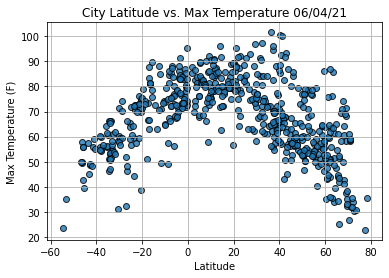

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

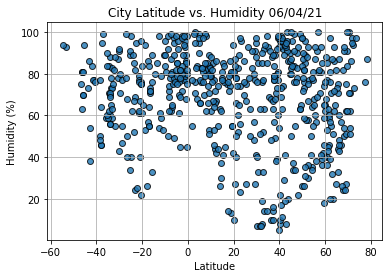

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

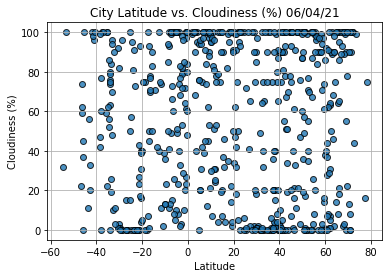

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

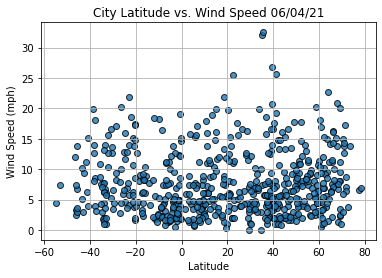

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()